In [10]:
%pip install BioPython

Note: you may need to restart the kernel to use updated packages.


In [11]:
import Bio
#Bio.Seq untuk sequence 
#Bio.SeqUtils untuk tools sequence

In [42]:
from Bio.SeqUtils import GC

In [43]:
print("The Percentage found by built in funtion: ", GC(DNA))

The Percentage found by built in funtion:  62.5


In [44]:
DNA = Seq("ATGGCACGCGTGCGAT")
print(DNA)

ATGGCACGCGTGCGAT


<h1> Mencari Percentage dari DNA Sequence (penggunaaan library) </h1>

In [45]:
from Bio.SeqUtils import GC_fraction
#rumus cari AT = 1-percentage GC

ImportError: cannot import name 'GC_fraction' from 'Bio.SeqUtils' (c:\Anaconda3\envs\computational_biology\Lib\site-packages\Bio\SeqUtils\__init__.py)

<h1> Mencari percentage dengan function buatan sendiri </h1>

Method 1 : lebih panjang

In [ ]:
def gc_counter(Seq): #mengecek satu-satu
    gc = []
    for i in Seq:
        if i =="G" or i == "C":
            gc.append(i)
    return len(gc)/len(Seq)*100

def at_counter(Seq): #mengecek satu-satu
    at = []
    for i in Seq:
        if i =="A" or i == "T":
            at.append(i)
    return len(at)/len(Seq)*100

In [54]:
print(gc_counter(DNA))
#percentage_gc - gc_counter(DNA)
#bisa langsung digitung 
#bisa 
print(at_counter(DNA))

62.5
37.5


 Method 2 : Lebih pendek 

In [55]:
def gc_counter(seq):
    gc = [i for i in seq if i in "GC"]
    return len(gc)/len(seq)*100

def at_counter_counter(seq):
    at = [i for i in seq if i in "AT"]
    return len(at)/len(seq)*100

memvisualisasikan hasil dari percentagenya

In [56]:
#matplotlib untuk membuat percentage diagram
import matplotlib.pyplot as plt

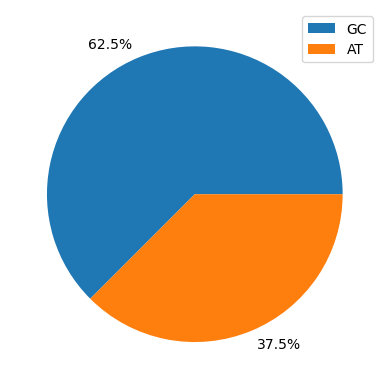

In [59]:
percentage_gc = gc_counter(DNA)
percentage_at = at_counter(DNA)

plt.pie(x =[percentage_gc, percentage_at], labels=[str(percentage_gc) + '%', str(percentage_at) + '%'])
plt.legend(["GC", "AT"])
plt.show()

Mencari Melting Point dari suatu DNA

In [60]:
from Bio.SeqUtils import MeltingTemp as mt 

In [62]:
print(mt.Tm_GC(DNA)) #mencari melting point berdasarkan komposisi GC
print(mt.Tm_NN(DNA)) #mencari pasangan basa terdekat menurut termod
print(mt.Tm_Wallace(DNA))

47.77989226541517
54.61931336297471
52.0


mencari Tm_Wallance secara manual 

In [66]:
def Tm_Wallance_func(seq):
    jumlahA = seq.count("A")
    jumlahT = seq.count("T")
    jumlahG = seq.count("G")
    jumlahC = seq.count("C")
    
    #ada 2 rumus lebih dari 14 atau kurang dari 14
    if (len(seq) < 14):
        return (jumlahA + jumlahT) * 2 + (jumlahC + jumlahG) * 4
    else :
        return round (64.9 + 41 * (jumlahG + jumlahC - 16.4) / len(seq), 2)

mencari molecular weight

In [67]:
from Bio.SeqUtils import molecular_weight as mw

In [69]:
print(mw(DNA))

5002.177


mencari molecular weight per komposisi

reminder : jangan lupa bikin argumennya sequence, nucleotide

In [74]:
def mw_per_komposisi(seq, nucleotide):
    n = [x for x in seq if x in nucleotide]
    n_string = "".join(n)
    return n_string 

In [75]:
print(mw(mw_per_komposisi(DNA, "G"), "DNA"))
print(mw(mw_per_komposisi(DNA, "T"), "DNA"))
print(mw(mw_per_komposisi(DNA, "A"), "DNA"))
print(mw(mw_per_komposisi(DNA, "C"), "DNA"))

1993.2507000000003
930.5949
957.6347999999998
1174.7424999999998
